___

<a href='https://github.com/pick1'> <img src='tensorflow.jpg' /></a>
___

# Tensorflow Project 
This Deep Learning project looked at the effectiveness of Neural Nets!

It used the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

Could this be the kind of task that is perfect for Neural Networks and Deep Learning?

## Libraries and Data

** Pandas to read in the bank_note_data.csv file **

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import tensorflow as tf

In [3]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [10]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## EDA

A couple quick plots to visualize the  data.


** Countplot of the Classes (Authentic 1 vs Fake 0) **

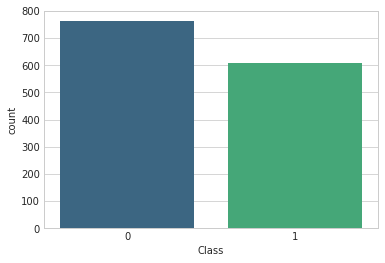

In [15]:
sns.countplot(x='Class',data=df, palette = 'viridis');

** PairPlot of the Data with Seaborn, Hue = Class **

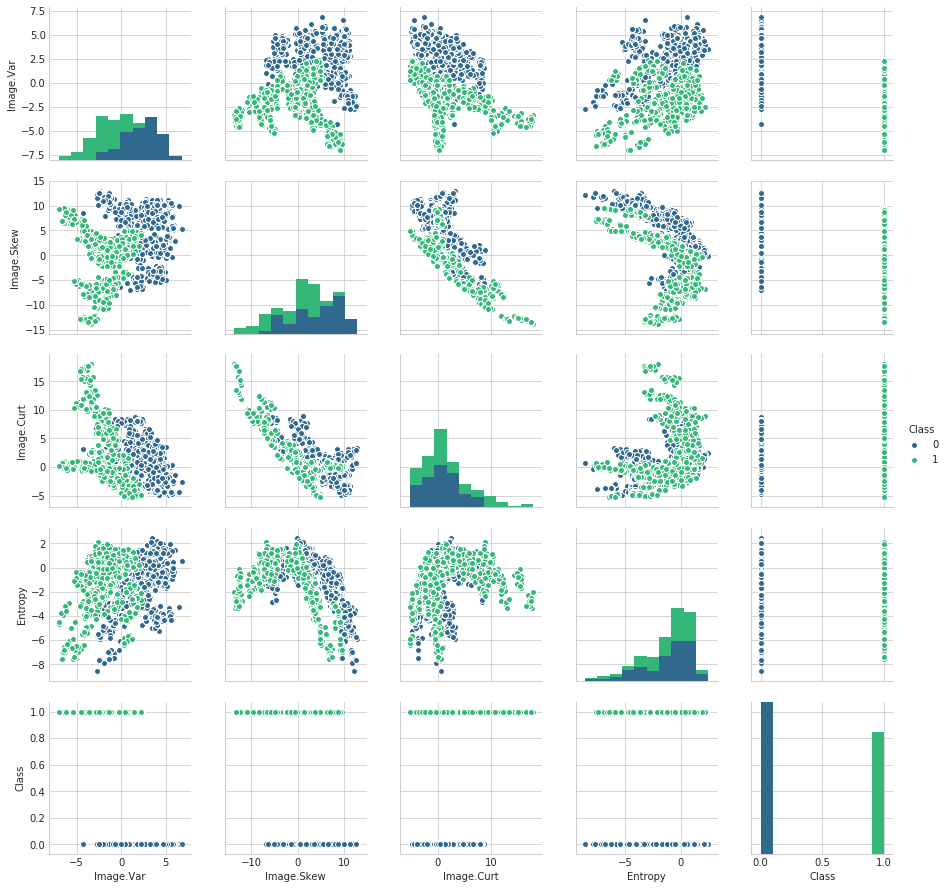

In [17]:
sns.pairplot(data=df, hue = 'Class', palette = 'viridis');

## Data Preparation 

It is important to standardize the data when working with Neural Network and Deep Learning based systems. While not necessary with this dataset, it is good practice.

### Standard Scaling

** StandardScaler() from SciKit Learn**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit scaler to the features.**

In [21]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**.transform() to transform the features to a scaled version.**

In [22]:
scaled_features = scaler.fit_transform(df.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** X and y are the scaled feature values and labels respectively.**

In [25]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df['Class']

** Converting X and y to matrices with .as_matrix(). This is how TensorFlow will accept the data (in numpy arrays, not Pandas Dataframe). **

In [26]:
X = X.as_matrix()
y = y.as_matrix()

** SciKit Learn to create training and testing sets of the data.**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Contrib.learn

**tensorflow.contrib.learn as learn**

In [29]:
import tensorflow.contrib.learn as learn

** New object called classifier which is a DNNClassifier from .learn. Set to 2 classes and a [10,20,10] hidden unit layer structure:**

In [35]:
feature_columns = [tf.contrib.layers.real_valued_column("",dimension = 3)]
classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2, feature_columns = feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_model_dir': '/tmp/tmpw1xz6tur', '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_environment': 'local', '_num_ps_replicas': 0, '_tf_random_seed': None, '_task_type': None, '_keep_checkpoint_max': 5, '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7b3754596940>, '_master': '', '_is_chief': True, '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_session_config': None}


** Fitting classifier to the training data. Use steps=200 with a batch_size of 20.**

*Note: warnings won't effect output*

In [37]:
classifier.fit(X_train, y_train, steps=200, batch_size=20);

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmpw1xz6tur/model.ckpt-200
INFO:tensorflow:Saving checkpoints for 201 into /tmp/tmpw1xz6tur/model.ckpt.
INFO:tensorflow:step = 201, loss = 0.009031495
INFO:tensorflow:global_step/sec: 240.98
INFO:tensorflow:step = 301, loss = 0.006144952 (0.417 sec)
INFO:tensorflow:Saving checkpoints for 400 into /tmp/tmpw1xz6tur/model.ckpt.
INFO:tensorflow:Loss for final step: 0.003836777.


## Model Evaluation

** Using predict method from the classifier model to create predictions from X_test **

In [60]:
note_predictions = list(classifier.predict(X_test));

INFO:tensorflow:Restoring parameters from /tmp/tmpw1xz6tur/model.ckpt-400


** Creating and running Classification report and a Confusion Matrix.**

In [62]:
from sklearn.metrics import classification_report,confusion_matrix


In [66]:
print("Confusion Matrix: ","\n"*2,confusion_matrix(y_test,note_predictions),"\n"*2)
print("Classification Report: ","\n"*2,classification_report(y_test,note_predictions))

Confusion Matrix:  

 [[238   0]
 [  0 174]] 


Classification Report:  

              precision    recall  f1-score   support

          0       1.00      1.00      1.00       238
          1       1.00      1.00      1.00       174

avg / total       1.00      1.00      1.00       412



## Pre-Conclusion and Comparison

** Whoa! extremely accurate results from the DNN model! Let's compare this to a Random Forest Classifier for a reality check!**

**Just to make sure we ran a Random Forest Classifier to compare the confusion matrix and classification report to the DNN model**

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rfc_preds = rfc.predict(X_test)
print("Confusion Matrix: ","\n"*2,confusion_matrix(y_test,rfc_preds),"\n"*2)
print("Classification Report: ","\n"*2,classification_report(y_test,rfc_preds))

Confusion Matrix:  

 [[234   4]
 [  0 174]] 


Classification Report:  

              precision    recall  f1-score   support

          0       1.00      0.98      0.99       238
          1       0.98      1.00      0.99       174

avg / total       0.99      0.99      0.99       412



# Conclusion
** The Random Forest did very well too, but not quite as good as the DNN model. This shows how powerful the DNN model is! **